1.1: Import Libraries

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string
from nltk.text import Text


1.2: Import Dataset

In [2]:
df = pd.read_csv('Twitter Hate Speech.csv')
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


1.3 : Data Information 

1.3.1: How many numbers of observations and features

In [3]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [4]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [5]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
df.size

95886

In [8]:
# Predictor Attribute
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [9]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


In [10]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [11]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


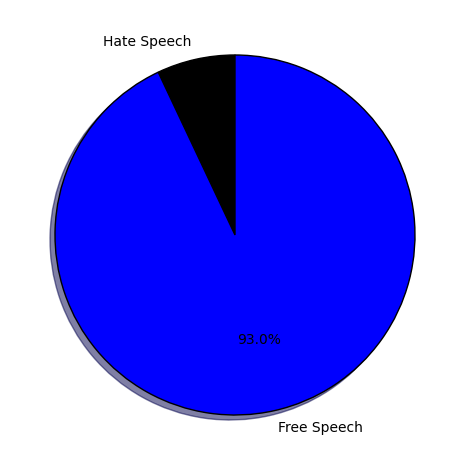

In [12]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['Black', 'blue'])

plt.tight_layout()
plt.show()

PART 2 : Data Preprocessing

2.1: Text Cleaning
2.1.1: Lower Case

In [13]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

2.1.2: Remove Punctuation

In [14]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

2.1.3: Remove URLs


In [15]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

2.1.4: Removing @tags

In [16]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

2.1.5: Remove Special Characters


In [17]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)

2.2 : Preprocessing Operations

2.2.1: Tokenizing


In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [19]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if not token in stopwords.words('english')]
    word_lem = WordNetLemmatizer()
    tokens = [word_lem.lemmatize(token) for token in tokens]
    return tokens

In [21]:
def generate_wordcloud(df, label):
    text = ' '.join(df[df['label'] == label]['tweet'].apply(str))
    tokens = preprocess_text(text)
    comment_words = ' '.join(tokens)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()       

              


In [22]:
# import TF-IDF model from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer



In [23]:
# init the TF-IDF model and take 5000 most frequent words from dictionaries
vectorizer = TfidfVectorizer(max_features= 2000)

In [24]:
# remove the list inside tweet cols which was create due to tokenization
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

In [25]:
# Shape of predictor after Feature Engineering
text.shape

(31962, 2)

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
from sklearn.model_selection import train_test_split

label = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (25569, 2)
y_train shape: (25569,)
X_test shape: (6393, 2)
y_test shape: (6393,)
